<a href="https://colab.research.google.com/github/KaisenWu/FeatureEngineering_Project_CourseRecords_Pandas/blob/main/FeatureEngineering_Project_CourseRecords_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Feature Engineering Project by Pandas</center>

## Project Overview
The purpose of this project is to clean and engineering the data by pandas and numpy.
The main techs includes:


1.   Missing value processing.
2.   String processing.
3.   Data type parsing.
4.   Column name processing.
5.   Data filtering.
6.   Dummy value processing.
7.   Corrilation and heatmap.

## About The Dataset
This dataset concludes ths records of the courses.


## Data Processing

In [1]:
# Import the libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the dataset.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab1/course_data_uncleaned.csv')

In [3]:
# Check the dataframe head.
df.head().transpose()

,0,1,2,3,4
course name,Algorithmic Trading & Quantitative Analysis Us...,ISO/IEC 27001. Information Security Management...,Procedural Terrain Generation with Unity,Jenkins 2 Bootcamp: Fully Automate Builds to D...,"Instagram Marketing 2020: Hashtags, Live, Stor..."
course category,design,business,development,development,office productivity
course sub category,Game Design,Data & Analytics,Programming Languages,Programming Languages,Microsoft
avg rating,4.2,4.6,4.6,4.6,4.5
number ratings,6340.0,9281.0,6833.0,72122.0,2826.0
enrollment,54930.0,48338.0,21218.0,717921.0,14269.0
last updated,8/2020,3/2018,10/2020,4/2020,10/2020
lectures,162.0,37.0,53.0,51.0,41.0
duration,19h 23m,3h 54m,5h 14m,9h 30m,7h 8m
price2,CA$23.99,CA$16.99,CA$23.99,CA$21.99,CA$19.99


In [4]:
# Check the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004 entries, 0 to 2003
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course name          1970 non-null   object 
 1   course category      1970 non-null   object 
 2   course sub category  1970 non-null   object 
 3   avg rating           1967 non-null   float64
 4   number ratings       1967 non-null   float64
 5   enrollment           1965 non-null   float64
 6   last updated         1970 non-null   object 
 7   lectures             1966 non-null   float64
 8   duration             1970 non-null   object 
 9   price2               1651 non-null   object 
 10  price                659 non-null    object 
 11  discount             1970 non-null   object 
 12  inst rating          1967 non-null   float64
 13  inst review          1967 non-null   float64
 14  inst student         1970 non-null   float64
 15  inst course          1970 non-null   f

In [5]:
# Get the statistics information.
df.describe()

,avg rating,number ratings,enrollment,lectures,inst rating,inst review,inst student,inst course
count,1967.000000,1967.000000,1.965000e+03,1966.000000,1967.000000,1967.000000,1.970000e+03,1970.000000
mean,4.407270,4708.649720,2.542528e+04,105.789929,4.412354,48894.806304,2.209746e+05,29.349746
std,0.271507,14306.115023,6.109779e+04,100.122851,0.230230,98284.751447,3.768465e+05,94.717280
min,2.100000,17.000000,3.600000e+01,5.000000,2.600000,31.000000,5.500000e+01,1.000000
25%,4.300000,598.500000,3.696000e+03,44.000000,4.300000,2515.500000,1.593425e+04,5.000000
50%,4.500000,1411.000000,9.313000e+03,74.000000,4.500000,11423.000000,6.334700e+04,12.000000
75%,4.600000,3492.500000,2.139300e+04,125.750000,4.600000,43931.000000,2.421375e+05,23.000000
max,4.900000,321904.000000,1.112443e+06,699.000000,4.800000,652986.000000,2.168985e+06,1420.000000


In [6]:
# Check NAN value in each column.
df.isnull().sum()

course name              34
course category          34
course sub category      34
avg rating               37
number ratings           37
enrollment               39
last updated             34
lectures                 38
duration                 34
price2                  353
price                  1345
discount                 34
inst rating              37
inst review              37
inst student             34
inst course              34
dtype: int64

In [7]:
# Drop rows having only missing values.
df.dropna(how='all', inplace=True)

In [8]:
# Check the price column NAN value.
df['price'].isnull().sum()

1311

In [9]:
# Check the price2 column NAN value.
df['price2'].isnull().sum()

319

In [10]:
# Use the price value to replace the NAN value in the price 2 column.
df['price2'].fillna(df['price'], inplace=True)

In [11]:
df.drop('price', axis=1, inplace=True)
df.rename(columns={'price2':'price'}, inplace=True)

In [12]:
# Drop the row which contain at least 1 NAN value.
df.dropna(inplace=True)

In [13]:
# Recheck the NAN values.
df.isnull().sum()

course name            0
course category        0
course sub category    0
avg rating             0
number ratings         0
enrollment             0
last updated           0
lectures               0
duration               0
price                  0
discount               0
inst rating            0
inst review            0
inst student           0
inst course            0
dtype: int64

In [14]:
df = pd.DataFrame(df.values, columns=df.columns.map(lambda x:x.replace(" ", "_")))

In [15]:
# Recheck columns' names
df.columns

Index(['course_name', 'course_category', 'course_sub_category', 'avg_rating',
       'number_ratings', 'enrollment', 'last_updated', 'lectures', 'duration',
       'price', 'discount', 'inst_rating', 'inst_review', 'inst_student',
       'inst_course'],
      dtype='object')

In [16]:
# Remove the % symbols from the discount column.
df['discount'] = df['discount'].apply(lambda x:x[:-1])

In [17]:
# Remove the text CA$ symbols from the price column.
df['price'] = df['price'].apply(lambda x:x.replace('CA$',''))

In [18]:
df['duration'].apply(lambda x:len(x)).value_counts()

6    1099
7     634
5     200
3      16
8       3
Name: duration, dtype: int64

In [19]:
for d in df['duration']:
  if len(d) == 3:
    print(d)

38m
57m
57m
53m
53m
51m
48m
58m
50m
42m
52m
48m
30m
41m
58m
31m


In [20]:
for d in df['duration']:
  if len(d) == 5:
    print(d)

7h 8m
4h 8m
5h 3m
6h 6m
9h 0m
9h 8m
6h 7m
2h 6m
3h 8m
4h 0m
6h 5m
6h 6m
4h 3m
2h 3m
3h 5m
6h 4m
7h 8m
5h 6m
5h 2m
3h 6m
5h 3m
5h 6m
7h 7m
7h 1m
3h 6m
2h 3m
4h 6m
1h 3m
2h 2m
4h 5m
4h 5m
3h 6m
1h 7m
3h 9m
7h 7m
2h 7m
5h 7m
8h 5m
3h 6m
5h 2m
6h 7m
5h 7m
6h 4m
5h 0m
3h 0m
9h 9m
6h 9m
6h 4m
4h 2m
2h 8m
5h 2m
5h 1m
7h 1m
4h 5m
9h 4m
7h 3m
2h 6m
5h 7m
9h 4m
3h 1m
7h 7m
8h 7m
5h 3m
4h 6m
4h 9m
9h 3m
2h 6m
4h 7m
6h 9m
3h 5m
8h 4m
4h 3m
2h 3m
8h 3m
9h 9m
8h 2m
3h 8m
3h 8m
9h 0m
4h 2m
2h 6m
7h 0m
8h 9m
3h 6m
3h 7m
3h 6m
5h 7m
5h 7m
5h 0m
3h 5m
4h 8m
2h 1m
7h 1m
4h 3m
2h 6m
6h 4m
7h 0m
1h 7m
7h 0m
5h 7m
5h 2m
4h 2m
9h 0m
9h 5m
1h 4m
1h 8m
1h 4m
1h 9m
2h 4m
4h 0m
2h 6m
4h 9m
9h 3m
1h 5m
1h 6m
1h 4m
4h 0m
9h 0m
6h 4m
3h 8m
9h 3m
6h 5m
2h 3m
2h 6m
7h 2m
5h 7m
4h 7m
3h 7m
4h 3m
7h 8m
2h 7m
8h 3m
2h 4m
2h 5m
5h 8m
6h 5m
5h 7m
6h 3m
3h 8m
2h 8m
4h 5m
5h 6m
4h 2m
6h 1m
4h 5m
3h 8m
2h 8m
3h 1m
6h 7m
6h 9m
4h 5m
8h 3m
9h 6m
3h 4m
5h 6m
8h 3m
2h 9m
4h 5m
1h 5m
3h 4m
2h 6m
7h 7m
8h 4m
4h 1m
6h 5m
7h 6m
7h 7

In [21]:
# Transform the value of duration into hours.
def tranDuration(d):
  if len(d) == 3:
    d = float(d[:-1])/60
  else:
    dArr = d.split(" ")
    d = float(dArr[0][:-1]) + float(dArr[1][:-1])/60
  return d
df['duration'] = df['duration'].apply(tranDuration)

In [22]:
df['last_updated']

0        8/2020
1        3/2018
2       10/2020
3        4/2020
4       10/2020
         ...   
1947     9/2020
1948     6/2015
1949     6/2020
1950     3/2017
1951    10/2020
Name: last_updated, Length: 1952, dtype: object

In [23]:
# Transform the value of last_updated into a number representing the value.
def transLast(last):
  lastArr = last.split('/')
  x = float(lastArr[1][-2:]) + float(lastArr[0])/100
  return x

df['last_updated'] = df['last_updated'].apply(transLast)

In [24]:
# Change the datatypes of column discount, price and last_updated into float64.
df['price'] = pd.to_numeric(df['price'])
df['discount'] = pd.to_numeric(df['discount'])
df['last_updated'] = pd.to_numeric(df['last_updated'])

In [25]:
df['course_category'].value_counts()

development             575
it software             462
business                358
design                  148
teaching academics       77
personal development     71
marketing                70
office productivity      52
music                    48
health fitness           37
lifestyle                31
photography              21
finance accounting        1
other                     1
Name: course_category, dtype: int64

In [26]:
# Combine some courses to reduce the amount of the course number.
def combine_course(course):
  if 'business' in course.lower() or 'finance' in course.lower() or 'marketing' in course.lower() or 'office' in course.lower() or 'teaching' in course.lower() or 'personal development' in course.lower():
    course = 'business & education'.replace(" ", "_")
  elif 'music' in course.lower() or 'lifestyle' in course.lower() or 'health' in course.lower() or 'photo' in course.lower() or 'other' in course.lower():
    course = 'personal hobby'.replace(" ", "_")
  else:
    course = course.replace(" ", "_")
  return course
df['course_category'] = df['course_category'].apply(combine_course)

In [27]:
df['course_category'].value_counts()

business_&_education    629
development             575
it_software             462
design                  148
personal_hobby          138
Name: course_category, dtype: int64

In [28]:
df.columns

Index(['course_name', 'course_category', 'course_sub_category', 'avg_rating',
       'number_ratings', 'enrollment', 'last_updated', 'lectures', 'duration',
       'price', 'discount', 'inst_rating', 'inst_review', 'inst_student',
       'inst_course'],
      dtype='object')

In [29]:
# Drop the unneeded fetures.
df.drop(['course_name','course_sub_category'], axis=1, inplace=True)

In [30]:
# Reset the index.
df.reset_index(inplace=True)

In [31]:
# Recheck the dataframe.
df.head()

,index,course_category,avg_rating,number_ratings,enrollment,last_updated,lectures,duration,price,discount,inst_rating,inst_review,inst_student,inst_course
0,0,design,4.2,6340.0,54930.0,20.08,162.0,19.383333,23.99,90,4.2,13453.0,179306.0,12.0
1,1,business_&_education,4.6,9281.0,48338.0,18.03,37.0,3.900000,16.99,56,4.5,246008.0,1145810.0,81.0
2,2,development,4.6,6833.0,21218.0,20.10,53.0,5.233333,23.99,91,4.6,19993.0,55621.0,3.0
3,3,development,4.6,72122.0,717921.0,20.04,51.0,9.500000,21.99,88,4.6,75247.0,751881.0,2.0
4,4,business_&_education,4.5,2826.0,14269.0,20.10,41.0,7.133333,19.99,88,4.5,11922.0,53659.0,10.0


In [32]:
# Save the data to a new csv file.
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Lab1/course_data_cleaned.csv', index=False)

In [33]:
# Read the data from the saved csv file.
df_cleaned = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab1/course_data_cleaned.csv')

In [34]:
# Check the head.
df_cleaned.head().transpose()

,0,1,2,3,4
index,0,1,2,3,4
course_category,design,business_&_education,development,development,business_&_education
avg_rating,4.2,4.6,4.6,4.6,4.5
number_ratings,6340.0,9281.0,6833.0,72122.0,2826.0
enrollment,54930.0,48338.0,21218.0,717921.0,14269.0
last_updated,20.08,18.03,20.1,20.04,20.1
lectures,162.0,37.0,53.0,51.0,41.0
duration,19.383333,3.9,5.233333,9.5,7.133333
price,23.99,16.99,23.99,21.99,19.99
discount,90,56,91,88,88


In [35]:
# Check null values.
df_cleaned.isnull().sum()

index              0
course_category    0
avg_rating         0
number_ratings     0
enrollment         0
last_updated       0
lectures           0
duration           0
price              0
discount           0
inst_rating        0
inst_review        0
inst_student       0
inst_course        0
dtype: int64

In [36]:
# Check the columns information.
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            1952 non-null   int64  
 1   course_category  1952 non-null   object 
 2   avg_rating       1952 non-null   float64
 3   number_ratings   1952 non-null   float64
 4   enrollment       1952 non-null   float64
 5   last_updated     1952 non-null   float64
 6   lectures         1952 non-null   float64
 7   duration         1952 non-null   float64
 8   price            1952 non-null   float64
 9   discount         1952 non-null   int64  
 10  inst_rating      1952 non-null   float64
 11  inst_review      1952 non-null   float64
 12  inst_student     1952 non-null   float64
 13  inst_course      1952 non-null   float64
dtypes: float64(11), int64(2), object(1)
memory usage: 213.6+ KB


In [37]:
# Check the statistic information.
df_cleaned.describe()

,index,avg_rating,number_ratings,enrollment,last_updated,lectures,duration,price,discount,inst_rating,inst_review,inst_student,inst_course
count,1952.000000,1952.000000,1952.000000,1.952000e+03,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1.952000e+03,1952.000000
mean,975.500000,4.407736,4724.838115,2.547321e+04,19.317515,105.695697,11.843443,23.523299,78.588627,4.412807,49190.690574,2.219591e+05,29.289959
std,563.638182,0.271028,14356.671383,6.126212e+04,1.293075,100.271526,13.131620,20.596236,16.452168,0.229835,98598.883546,3.775576e+05,94.874580
min,0.000000,2.100000,17.000000,3.600000e+01,11.080000,5.000000,0.500000,16.990000,30.000000,2.600000,31.000000,5.500000e+01,1.000000
25%,487.750000,4.300000,599.750000,3.702500e+03,19.050000,44.000000,4.345833,16.990000,74.000000,4.300000,2527.250000,1.599500e+04,5.000000
50%,975.500000,4.500000,1415.000000,9.288500e+03,20.050000,74.000000,7.825000,19.990000,86.000000,4.500000,11423.000000,6.335600e+04,12.000000
75%,1463.250000,4.600000,3505.000000,2.139450e+04,20.090000,125.000000,14.233333,21.990000,89.000000,4.600000,43931.000000,2.426830e+05,23.000000
max,1951.000000,4.900000,321904.000000,1.112443e+06,20.100000,699.000000,164.000000,199.990000,92.000000,4.800000,652986.000000,2.168985e+06,1420.000000


In [38]:
# Display the statistics summary with 0.01 and 0.99 percentile.
df_stats = df_cleaned.describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99])
df_stats

,index,avg_rating,number_ratings,enrollment,last_updated,lectures,duration,price,discount,inst_rating,inst_review,inst_student,inst_course
count,1952.000000,1952.000000,1952.000000,1.952000e+03,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1.952000e+03,1952.000000
mean,975.500000,4.407736,4724.838115,2.547321e+04,19.317515,105.695697,11.843443,23.523299,78.588627,4.412807,49190.690574,2.219591e+05,29.289959
std,563.638182,0.271028,14356.671383,6.126212e+04,1.293075,100.271526,13.131620,20.596236,16.452168,0.229835,98598.883546,3.775576e+05,94.874580
min,0.000000,2.100000,17.000000,3.600000e+01,11.080000,5.000000,0.500000,16.990000,30.000000,2.600000,31.000000,5.500000e+01,1.000000
1%,19.510000,3.400000,70.000000,3.441200e+02,14.115100,10.000000,1.066667,16.990000,32.000000,3.600000,142.510000,6.490400e+02,1.000000
25%,487.750000,4.300000,599.750000,3.702500e+03,19.050000,44.000000,4.345833,16.990000,74.000000,4.300000,2527.250000,1.599500e+04,5.000000
50%,975.500000,4.500000,1415.000000,9.288500e+03,20.050000,74.000000,7.825000,19.990000,86.000000,4.500000,11423.000000,6.335600e+04,12.000000
75%,1463.250000,4.600000,3505.000000,2.139450e+04,20.090000,125.000000,14.233333,21.990000,89.000000,4.600000,43931.000000,2.426830e+05,23.000000
99%,1931.490000,4.800000,53275.190000,3.081269e+05,20.100000,519.410000,64.750833,149.990000,92.000000,4.700000,509993.000000,1.979353e+06,330.000000
max,1951.000000,4.900000,321904.000000,1.112443e+06,20.100000,699.000000,164.000000,199.990000,92.000000,4.800000,652986.000000,2.168985e+06,1420.000000


In [39]:
# Display the course(s) that has the highest enrollment.
df_cleaned[df_cleaned['enrollment'] == df_cleaned['enrollment'].max()]['course_category']

764    development
Name: course_category, dtype: object

In [40]:
# Display the course(s) that has the minimum enrollment.
df_cleaned[df_cleaned['enrollment'] == df_cleaned['enrollment'].min()]['course_category']

1781    business_&_education
Name: course_category, dtype: object

In [41]:
# Display the courses whose enrollment is higher than its 99% percentile.
df_cleaned[df_cleaned['enrollment'] > df_stats.loc['99%']['enrollment']]['course_category']

3                development
147                   design
172              development
236                   design
335     business_&_education
452              development
514              development
713              development
764              development
801              development
810              development
877     business_&_education
984              development
1012             development
1204             development
1249             development
1345    business_&_education
1360             development
1531             it_software
1825                  design
Name: course_category, dtype: object

In [42]:
# Display the courses whose average ratings is higher than its 99% percentile.
df_cleaned[df_cleaned['avg_rating'] > df_stats.loc['99%']['avg_rating']]['course_category']

90         development
272        development
429     personal_hobby
564             design
1124       development
1368    personal_hobby
1700       development
1716            design
Name: course_category, dtype: object

In [43]:
# Display the courses whose average ratings is lower than its 1% percentile.
df_cleaned[df_cleaned['avg_rating'] < df_stats.loc['1%']['avg_rating']]['course_category']

5       business_&_education
255              it_software
286              it_software
444     business_&_education
823              it_software
931              it_software
1015             it_software
1093             it_software
1336             development
1357    business_&_education
1475             it_software
1537    business_&_education
1650             it_software
1765             it_software
1889             it_software
1892             it_software
Name: course_category, dtype: object

In [44]:
# Find out the correlation among features.
df_cleaned.corr()['enrollment'].sort_values(ascending=False)[1:]

number_ratings    0.904692
inst_student      0.442934
inst_review       0.428507
avg_rating        0.154967
inst_rating       0.153504
lectures          0.068442
duration          0.064346
last_updated      0.036358
discount          0.020685
inst_course       0.006769
price            -0.016080
index            -0.031603
Name: enrollment, dtype: float64

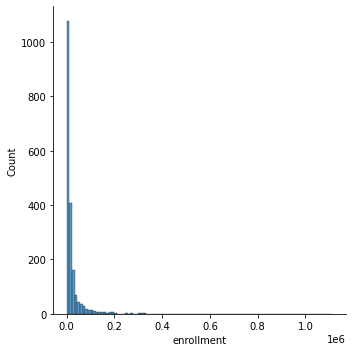

In [45]:
# Create a histogram plot of the enrollment.
sns.displot(df_cleaned['enrollment'], bins=100)

In [46]:
# Drop the data where the enrollment is greater than 10000,
df_cleaned.drop(df[df_cleaned['enrollment']>20000].index, inplace=True)

In [47]:
len(df_cleaned)

1429

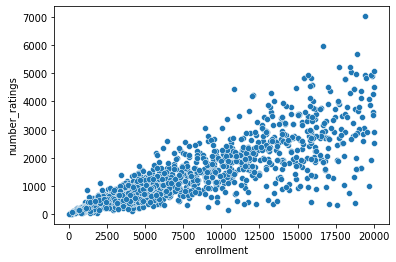

In [48]:
# Create pair plot with other features.
sns.scatterplot(data=df_cleaned, x='enrollment', y='number_ratings')

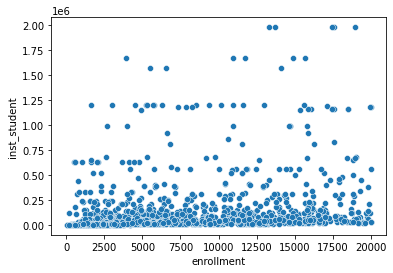

In [49]:
sns.scatterplot(data=df_cleaned, x='enrollment', y='inst_student')  

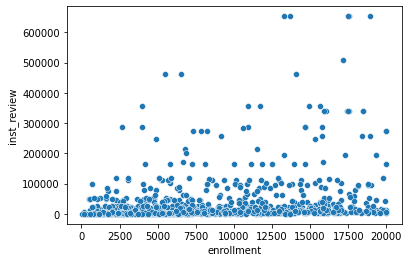

In [50]:
sns.scatterplot(data=df_cleaned, x='enrollment', y='inst_review')  

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


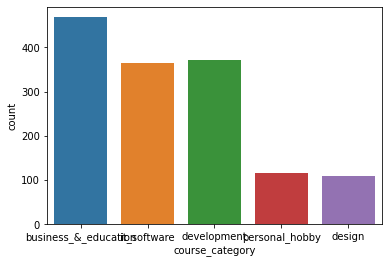

In [51]:
# Create count plots for the different categories of courses in the dataset.
sns.countplot(df_cleaned['course_category'])

In [52]:
df_stats_new = df_cleaned.describe()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


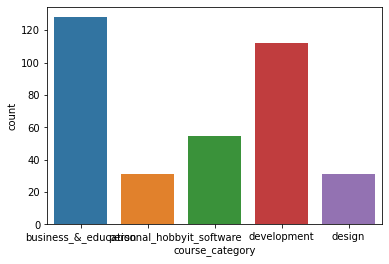

In [53]:
# Create count plots for the different categories of courses whose enrollment is higher than 75% percentile.
sns.countplot(df_cleaned[df_cleaned['enrollment'] > df_stats_new.loc['75%']['enrollment']]['course_category'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


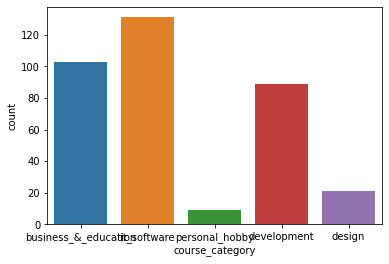

In [54]:
# Create count plots for the different categories of courses whose average ratings is lower than 25% percentile.
sns.countplot(df_cleaned[df_cleaned['avg_rating'] < df_stats_new.loc['25%']['avg_rating']]['course_category'])

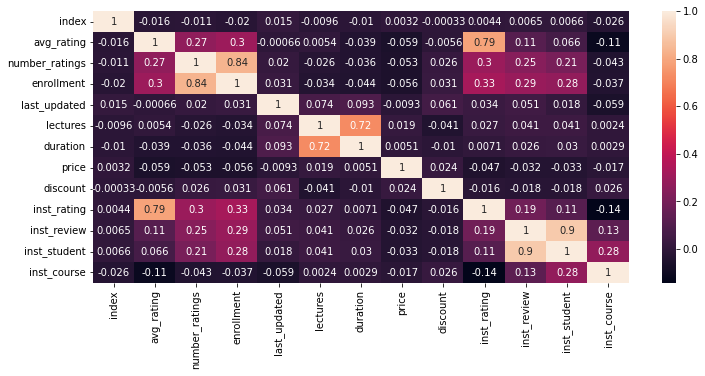

In [55]:
# Plot the correlation heatmap.
plt.figure(figsize=(12,5))
sns.heatmap(df_cleaned.corr(), annot=True)

In [56]:
# Transform course category into dummy values.
course_dummy = pd.get_dummies(df_cleaned['course_category'], drop_first=True, prefix='cat')
df_cleaned = pd.concat([df_cleaned, course_dummy], axis=1)

In [57]:
df_cleaned.head()

,index,course_category,avg_rating,number_ratings,enrollment,last_updated,lectures,duration,price,discount,inst_rating,inst_review,inst_student,inst_course,cat_design,cat_development,cat_it_software,cat_personal_hobby
4,4,business_&_education,4.5,2826.0,14269.0,20.10,41.0,7.133333,19.99,88,4.5,11922.0,53659.0,10.0,0,0,0,0
5,5,business_&_education,3.3,320.0,2088.0,17.02,72.0,4.133333,16.99,90,3.3,320.0,4012.0,3.0,0,0,0,0
6,6,business_&_education,4.4,991.0,3563.0,20.08,91.0,5.233333,28.99,77,4.4,2193.0,7422.0,6.0,0,0,0,0
8,8,it_software,4.7,556.0,2263.0,20.10,70.0,4.966667,16.99,88,4.6,74745.0,517994.0,42.0,0,0,1,0
9,9,development,4.3,2060.0,10927.0,20.07,477.0,51.983333,20.99,87,4.5,288507.0,988948.0,50.0,0,1,0,0


In [58]:
df_cleaned.drop(['index', 'course_category'], axis=1, inplace=True)

In [59]:
df_cleaned.head()

,avg_rating,number_ratings,enrollment,last_updated,lectures,duration,price,discount,inst_rating,inst_review,inst_student,inst_course,cat_design,cat_development,cat_it_software,cat_personal_hobby
4,4.5,2826.0,14269.0,20.10,41.0,7.133333,19.99,88,4.5,11922.0,53659.0,10.0,0,0,0,0
5,3.3,320.0,2088.0,17.02,72.0,4.133333,16.99,90,3.3,320.0,4012.0,3.0,0,0,0,0
6,4.4,991.0,3563.0,20.08,91.0,5.233333,28.99,77,4.4,2193.0,7422.0,6.0,0,0,0,0
8,4.7,556.0,2263.0,20.10,70.0,4.966667,16.99,88,4.6,74745.0,517994.0,42.0,0,0,1,0
9,4.3,2060.0,10927.0,20.07,477.0,51.983333,20.99,87,4.5,288507.0,988948.0,50.0,0,1,0,0


In [60]:
df_cleaned.to_csv('/content/drive/MyDrive/Colab Notebooks/Lab1/course_data_prepared.csv',index=False)